# Pre-trained networks

### Imports

In [ ]:
import torch
from torch import nn
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import Grayscale
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from google.colab import drive

import gc

### Mounting Google Drive

In [ ]:
drive.mount('/content/drive/', force_remount=True)

# Define the root folder paths
GDrivePath = '/content/drive/MyDrive/'

# Specify the folder path
#folderpath = GDrivePath + 'Colab Notebooks/CVPR2023/Progetto_CV&PR_Finale/'
folderpath = GDrivePath + 'Colab Notebooks/Computer Vision & Pattern Recognition/Progetto_CV&PR_Finale/'

# Define folder paths for train and test images
train_filepath = folderpath + 'train/'
test_filepath = folderpath + 'test/'

Mounted at /content/drive/


### Import some modules made by us

In [ ]:
# Change directory
os.chdir(folderpath)
!pwd

/content/drive/MyDrive/Colab Notebooks/Computer Vision & Pattern Recognition/Progetto_CV&PR_Finale


In [ ]:
from datasets_utilities import show_images, load_images_from_folder
from training_utilities import train_CNN

### Dataloaders initialization

In [ ]:
# Function to generate new images by horizontally flipping the given ones
def flip_images(set):
    new_images=[]
    images_to_flip=set.copy()
    for image in images_to_flip:
      new_images.append(torch.flip(image, dims=[2]) ) # 2 corresponds to the width axis
    return new_images

# Transform adapted for AlexNet
transform_AlexNet = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert image to RGB
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize tensors according to comunity standards
])

transform_with_crop_AlexNet = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Converte l'immagine da scala di grigi a RGB
    transforms.RandomRotation(degrees=(-10, 10)),#random rotation between -10 and 10 degrees
    transforms.RandomResizedCrop(size=(227, 227), scale=(0.7, 1.0)),
    transforms.ToTensor(),  # Converte l'immagine in tensori
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalizza i tensori utilizzando valori standard ottenuti dal dataset ImageNet
])

# Transform needed to load images as they are
transform_identity = transforms.Compose([])

#### Non augmented Dataset

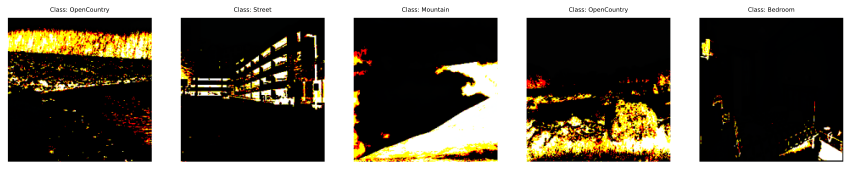

In [ ]:
train_set = None
test_set = None
test_set = None
train_labels = None
test_labels = None
val_labels = None

gc.collect()

batch_size=32

train_set, train_labels = load_images_from_folder(train_filepath, transform_AlexNet)
test_set, test_labels = load_images_from_folder(test_filepath, transform_AlexNet)

# Split training images to create training (85%) and validation (15%) sets
train_set, val_set, train_labels, val_labels = train_test_split(
    train_set, train_labels, test_size=0.15, random_state=42, stratify=train_labels
)

show_images(train_set, train_labels)

# Create PyTorch datasets
train_set = torch.utils.data.TensorDataset(torch.stack(train_set), torch.tensor(train_labels))
val_set = torch.utils.data.TensorDataset(torch.stack(val_set), torch.tensor(val_labels))
test_set = torch.utils.data.TensorDataset(torch.stack(test_set), torch.tensor(test_labels))

# Create DataLoaders
train_set = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_set = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_set = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

#### Augmented Dataset

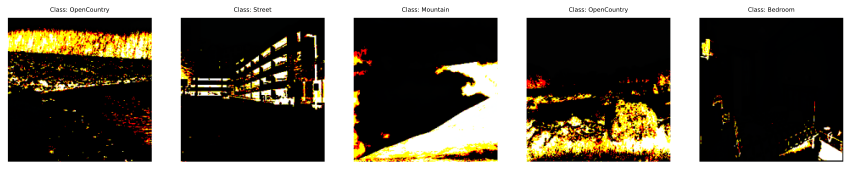

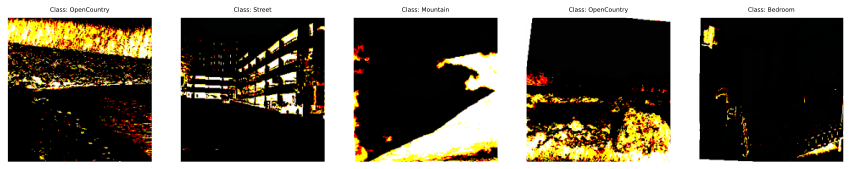

In [ ]:
train_set = None
test_set = None
test_set = None
train_labels = None
test_labels = None
val_labels = None

gc.collect()

batch_size=32

train_set, train_labels = load_images_from_folder(train_filepath, transform_identity)
test_set, test_labels = load_images_from_folder(test_filepath, transform_AlexNet)

test_set = torch.utils.data.TensorDataset(torch.stack(test_set), torch.tensor(test_labels))
test_set = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

gc.collect()

# Split training images to create training (85%) and validation (15%) sets
train_set, val_set, train_labels, val_labels = train_test_split(
    train_set, train_labels, test_size=0.15, random_state=42, stratify=train_labels
)

val_set = [transform_AlexNet(image) for image in val_set]

val_set = torch.utils.data.TensorDataset(torch.stack(val_set), torch.tensor(val_labels))
val_set = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

gc.collect()

train_cropped_set = [transform_with_crop_AlexNet(image) for image in train_set]
train_set = [transform_AlexNet(image) for image in train_set]

show_images(train_set, train_labels, num_images=5)
show_images(train_cropped_set, train_labels, num_images=5)

train_set= train_set + train_cropped_set
#libero spazio
train_cropped_set= None
gc.collect()

train_labels = train_labels + train_labels

train_labels=train_labels+train_labels
train_set =train_set+flip_images(train_set)

gc.collect()

train_set = torch.utils.data.TensorDataset(torch.stack(train_set), torch.tensor(train_labels))
train_set = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

### Load and adapt AlexNet

### Testing AlexNet with non augmented Dataset

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 42.4MB/s]


Staring epoch   0 ...
   ACCURACY: train 59.9 % | validation 78.9 %
       LOSS: train  1.234 | validation  0.595
Staring epoch   1 ...
   ACCURACY: train 86.2 % | validation 82.4 %
       LOSS: train  0.429 | validation  0.479
Staring epoch   2 ...
   ACCURACY: train 88.2 % | validation 84.4 %
       LOSS: train  0.341 | validation  0.431
Staring epoch   3 ...
   ACCURACY: train 91.6 % | validation 84.4 %
       LOSS: train  0.284 | validation  0.552
Staring epoch   4 ...
   ACCURACY: train 92.6 % | validation 71.9 %
       LOSS: train  0.252 | validation  0.778
Staring epoch   5 ...
   ACCURACY: train 91.8 % | validation 84.8 %
       LOSS: train  0.245 | validation  0.405
Staring epoch   6 ...
   ACCURACY: train 94.2 % | validation 85.5 %
       LOSS: train  0.197 | validation  0.413
Staring epoch   7 ...
   ACCURACY: train 94.7 % | validation 86.3 %
       LOSS: train  0.187 | validation  0.409
Staring epoch   8 ...
   ACCURACY: train 95.0 % | validation 84.4 %
       LOSS: train  

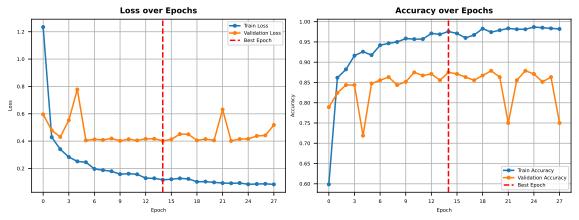



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 86 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 61.6 % | validation 68.8 %
       LOSS: train  1.207 | validation  0.699
Staring epoch   1 ...
   ACCURACY: train 85.3 % | validation 70.3 %
       LOSS: train  0.442 | validation  0.802
Staring epoch   2 ...
   ACCURACY: train 87.6 % | validation 82.0 %
       LOSS: train  0.372 | validation  0.438
Staring epoch   3 ...
   ACCURACY: train 90.0 % | validation 85.2 %
       LOSS: train  0.304 | validation  0.428
Staring epoch   4 ...
   ACCURACY: train 92.5 % | validation 82.4 %
       LOSS: train  0.256 | validation  0.456
Staring epoch   5 ...
   ACCURACY: train 93.0 % | validation 85.9 %
       LOSS: train  0.240 | validation  0.423
Staring epoch   6 ...
   ACCURACY: train 94.4 % | validation 85.9 %
       LOSS: train  0.204 | validation  0.418
Staring epoch   7 ...
   ACCURACY: train 95.3 % | validation 84.4 %
       LOSS: train  0.184 | validation  0.459
Staring epoch   8 ...
   ACCURACY: train 95.4 % | validation 85.5 %
       LOSS: train  

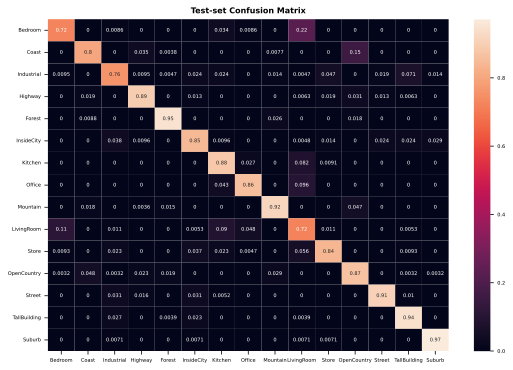

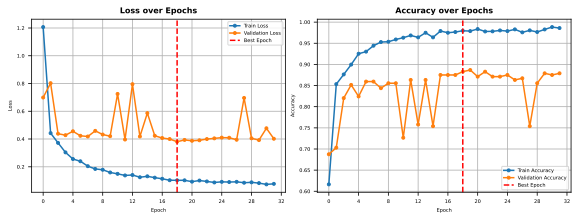



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 86 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 61.8 % | validation 82.4 %
       LOSS: train  1.212 | validation  0.586
Staring epoch   1 ...
   ACCURACY: train 84.8 % | validation 82.0 %
       LOSS: train  0.453 | validation  0.464
Staring epoch   2 ...
   ACCURACY: train 88.3 % | validation 84.0 %
       LOSS: train  0.347 | validation  0.485
Staring epoch   3 ...
   ACCURACY: train 91.3 % | validation 84.8 %
       LOSS: train  0.276 | validation  0.451
Staring epoch   4 ...
   ACCURACY: train 92.4 % | validation 85.2 %
       LOSS: train  0.254 | validation  0.479
Staring epoch   5 ...
   ACCURACY: train 93.4 % | validation 85.9 %
       LOSS: train  0.227 | validation  0.427
Staring epoch   6 ...
   ACCURACY: train 93.3 % | validation 87.1 %
       LOSS: train  0.216 | validation  0.404
Staring epoch   7 ...
   ACCURACY: train 95.4 % | validation 87.5 %
       LOSS: train  0.176 | validation  0.420
Staring epoch   8 ...
   ACCURACY: train 95.4 % | validation 72.7 %
       LOSS: train  

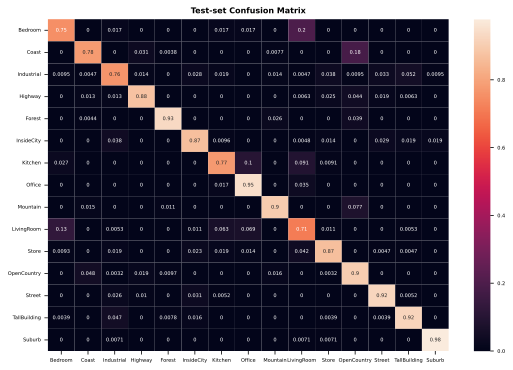

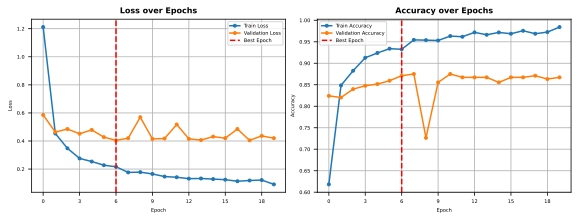



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 60.5 % | validation 80.9 %
       LOSS: train  1.248 | validation  0.575
Staring epoch   1 ...
   ACCURACY: train 84.2 % | validation 83.6 %
       LOSS: train  0.449 | validation  0.509
Staring epoch   2 ...
   ACCURACY: train 89.5 % | validation 69.9 %
       LOSS: train  0.325 | validation  0.626
Staring epoch   3 ...
   ACCURACY: train 89.6 % | validation 84.8 %
       LOSS: train  0.291 | validation  0.428
Staring epoch   4 ...
   ACCURACY: train 91.8 % | validation 85.2 %
       LOSS: train  0.259 | validation  0.430
Staring epoch   5 ...
   ACCURACY: train 92.5 % | validation 73.8 %
       LOSS: train  0.232 | validation  0.699
Staring epoch   6 ...
   ACCURACY: train 93.9 % | validation 85.5 %
       LOSS: train  0.197 | validation  0.422
Staring epoch   7 ...
   ACCURACY: train 95.4 % | validation 85.5 %
       LOSS: train  0.180 | validation  0.522
Staring epoch   8 ...
   ACCURACY: train 94.6 % | validation 85.9 %
       LOSS: train  

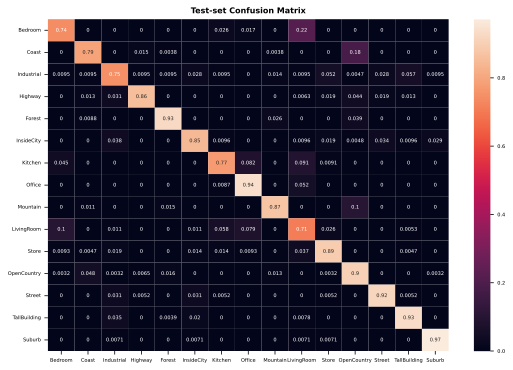

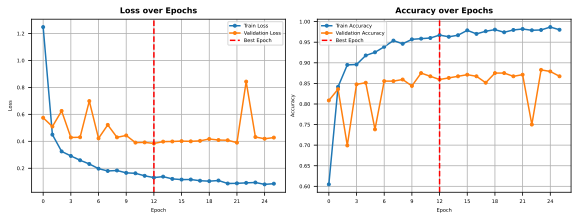



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 86 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 62.6 % | validation 82.0 %
       LOSS: train  1.204 | validation  0.546
Staring epoch   1 ...
   ACCURACY: train 85.3 % | validation 82.4 %
       LOSS: train  0.437 | validation  0.457
Staring epoch   2 ...
   ACCURACY: train 88.8 % | validation 83.2 %
       LOSS: train  0.341 | validation  0.441
Staring epoch   3 ...
   ACCURACY: train 91.4 % | validation 83.2 %
       LOSS: train  0.279 | validation  0.435
Staring epoch   4 ...
   ACCURACY: train 93.0 % | validation 85.2 %
       LOSS: train  0.252 | validation  0.407
Staring epoch   5 ...
   ACCURACY: train 94.0 % | validation 83.2 %
       LOSS: train  0.220 | validation  0.419
Staring epoch   6 ...
   ACCURACY: train 93.7 % | validation 85.9 %
       LOSS: train  0.216 | validation  0.409
Staring epoch   7 ...
   ACCURACY: train 95.0 % | validation 71.5 %
       LOSS: train  0.177 | validation  1.025
Staring epoch   8 ...
   ACCURACY: train 95.0 % | validation 84.0 %
       LOSS: train  

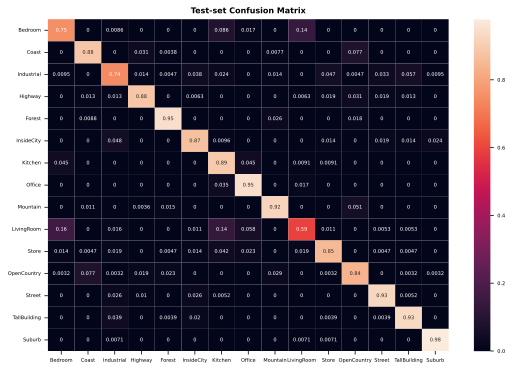

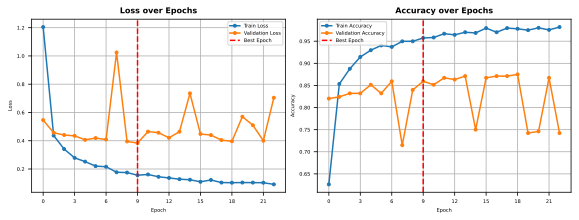



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 86 %




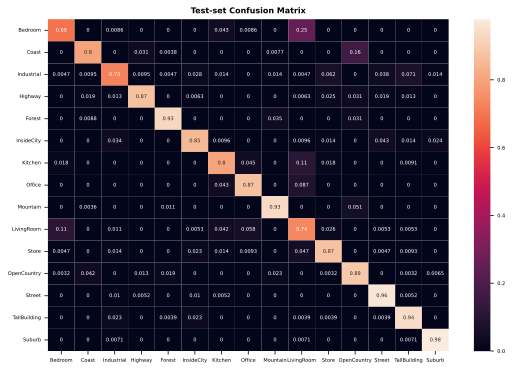

In [ ]:
# Test with SGD
n_realizations = 5
list_accs = []
list_best_epochs = []

results_df = pd.DataFrame()

for _ in range(n_realizations):
    # Load pre-trained AlexNet
    alexnet = models.alexnet(pretrained=True)

    # Freeze all network parameters
    for param in alexnet.parameters():
        param.requires_grad = False

    # Modify the last fully connected layer
    num_ftrs = alexnet.classifier[6].in_features # Compute the number of inputs featurs of the last layer
    alexnet.classifier[6] = nn.Linear(num_ftrs, 15) # Change the last layer, 15 is the number of classes of our problem
    # NB: Modifying tha last layer, automatically set "param.requires_grad = True" for this last layer
    _, test_accuracy, best_epoch = train_CNN(model = alexnet, MAX_epochs=60, MAX_patience= 12, learning_rate=0.001, momentum = 0.9, train_loader=train_set, validation_loader=val_set, test_loader=test_set, regularization_rate=0.008, optimizer_function= optim.SGD)
    list_accs.append(test_accuracy)
    list_best_epochs.append(best_epoch)

results_df["best_acc"] = list_accs
results_df["best_epoch"] = list_best_epochs
results_df.to_csv('exp_3_0001_09_nonAugment_SGD.csv', index=False)

In [ ]:
# Test with Adam
n_realizations = 5
list_accs = []
list_best_epochs = []

results_df = pd.DataFrame()

for _ in range(n_realizations):
    # Load pre-trained AlexNet
    alexnet = models.alexnet(pretrained=True)

    # Freeze all network parameters
    for param in alexnet.parameters():
        param.requires_grad = False

    # Modify the last fully connected layer
    num_ftrs = alexnet.classifier[6].in_features # Compute the number of inputs featurs of the last layer
    alexnet.classifier[6] = nn.Linear(num_ftrs, 15) # Change the last layer, 15 is the number of classes of our problem
    # NB: Modifying tha last layer, automatically set "param.requires_grad = True" for this last layer
    _, test_accuracy, best_epoch = train_CNN(model = alexnet, MAX_epochs=60, MAX_patience= 12, learning_rate=0.001, train_loader=train_set, validation_loader=val_set, test_loader=test_set, regularization_rate=0.008, optimizer_function= optim.Adam)
    list_accs.append(test_accuracy)
    list_best_epochs.append(best_epoch)

results_df["best_acc"] = list_accs
results_df["best_epoch"] = list_best_epochs
results_df.to_csv('exp_3_0001_nonAugment_Adam.csv', index=False)

### Testing AlexNet with augmented Dataset

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:14<00:00, 17.3MB/s]


Staring epoch   0 ...
   ACCURACY: train 77.8 % | validation 71.5 %
       LOSS: train  0.688 | validation  0.632
Staring epoch   1 ...
   ACCURACY: train 89.5 % | validation 85.2 %
       LOSS: train  0.317 | validation  0.415
Staring epoch   2 ...
   ACCURACY: train 92.5 % | validation 85.2 %
       LOSS: train  0.236 | validation  0.436
Staring epoch   3 ...
   ACCURACY: train 93.5 % | validation 84.8 %
       LOSS: train  0.208 | validation  0.420
Staring epoch   4 ...
   ACCURACY: train 94.9 % | validation 73.8 %
       LOSS: train  0.177 | validation  0.784
Staring epoch   5 ...
   ACCURACY: train 95.6 % | validation 72.7 %
       LOSS: train  0.158 | validation  0.564
Staring epoch   6 ...
   ACCURACY: train 95.5 % | validation 85.2 %
       LOSS: train  0.150 | validation  0.438
Staring epoch   7 ...
   ACCURACY: train 96.4 % | validation 85.5 %
       LOSS: train  0.135 | validation  0.432
Staring epoch   8 ...
   ACCURACY: train 96.4 % | validation 73.8 %
       LOSS: train  

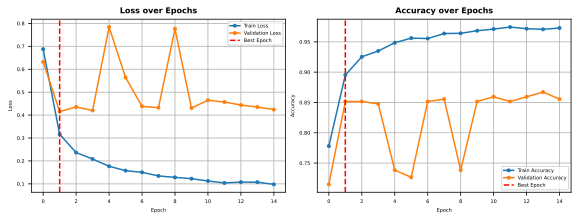



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 77.6 % | validation 85.9 %
       LOSS: train  0.686 | validation  0.427
Staring epoch   1 ...
   ACCURACY: train 89.7 % | validation 85.5 %
       LOSS: train  0.312 | validation  0.504
Staring epoch   2 ...
   ACCURACY: train 92.9 % | validation 84.8 %
       LOSS: train  0.235 | validation  0.407
Staring epoch   3 ...
   ACCURACY: train 93.6 % | validation 85.9 %
       LOSS: train  0.210 | validation  0.429
Staring epoch   4 ...
   ACCURACY: train 94.5 % | validation 85.5 %
       LOSS: train  0.175 | validation  0.435
Staring epoch   5 ...
   ACCURACY: train 95.5 % | validation 73.0 %
       LOSS: train  0.157 | validation  0.774
Staring epoch   6 ...
   ACCURACY: train 95.8 % | validation 86.3 %
       LOSS: train  0.146 | validation  0.416
Staring epoch   7 ...
   ACCURACY: train 96.2 % | validation 86.3 %
       LOSS: train  0.141 | validation  0.428
Staring epoch   8 ...
   ACCURACY: train 96.6 % | validation 85.9 %
       LOSS: train  

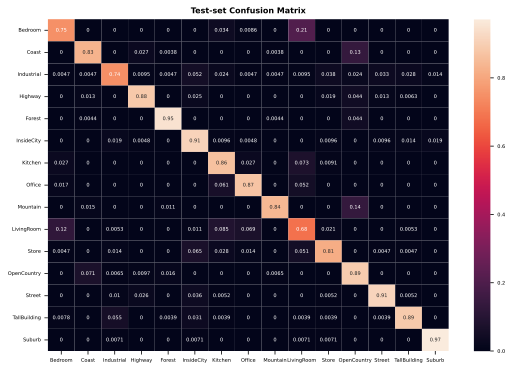

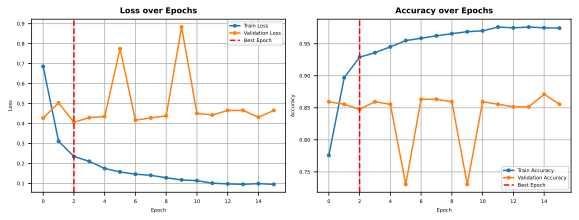



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 77.4 % | validation 75.0 %
       LOSS: train  0.689 | validation  0.543
Staring epoch   1 ...
   ACCURACY: train 89.5 % | validation 84.4 %
       LOSS: train  0.324 | validation  0.458
Staring epoch   2 ...
   ACCURACY: train 92.0 % | validation 87.1 %
       LOSS: train  0.245 | validation  0.407
Staring epoch   3 ...
   ACCURACY: train 93.6 % | validation 85.5 %
       LOSS: train  0.204 | validation  0.415
Staring epoch   4 ...
   ACCURACY: train 94.4 % | validation 86.7 %
       LOSS: train  0.181 | validation  0.416
Staring epoch   5 ...
   ACCURACY: train 95.4 % | validation 87.1 %
       LOSS: train  0.159 | validation  0.432
Staring epoch   6 ...
   ACCURACY: train 96.3 % | validation 86.7 %
       LOSS: train  0.141 | validation  0.427
Staring epoch   7 ...
   ACCURACY: train 96.4 % | validation 86.7 %
       LOSS: train  0.131 | validation  0.411
Staring epoch   8 ...
   ACCURACY: train 96.5 % | validation 86.7 %
       LOSS: train  

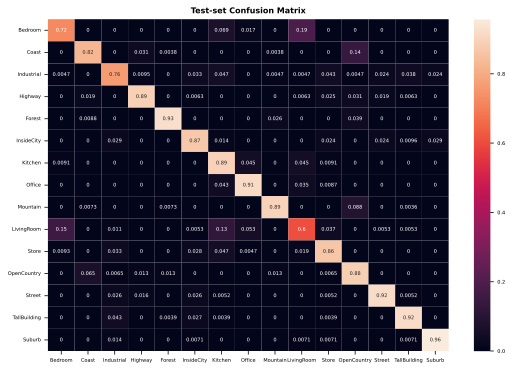

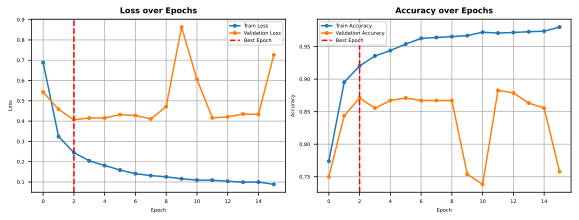



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 84 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 77.3 % | validation 81.2 %
       LOSS: train  0.708 | validation  0.507
Staring epoch   1 ...
   ACCURACY: train 89.8 % | validation 84.8 %
       LOSS: train  0.317 | validation  0.412
Staring epoch   2 ...
   ACCURACY: train 92.2 % | validation 85.2 %
       LOSS: train  0.243 | validation  0.442
Staring epoch   3 ...
   ACCURACY: train 93.5 % | validation 73.8 %
       LOSS: train  0.206 | validation  0.607
Staring epoch   4 ...
   ACCURACY: train 94.9 % | validation 85.9 %
       LOSS: train  0.176 | validation  0.439
Staring epoch   5 ...
   ACCURACY: train 96.0 % | validation 73.4 %
       LOSS: train  0.152 | validation  0.658
Staring epoch   6 ...
   ACCURACY: train 95.6 % | validation 84.0 %
       LOSS: train  0.152 | validation  0.466
Staring epoch   7 ...
   ACCURACY: train 96.3 % | validation 86.3 %
       LOSS: train  0.131 | validation  0.412
Staring epoch   8 ...
   ACCURACY: train 96.3 % | validation 86.3 %
       LOSS: train  

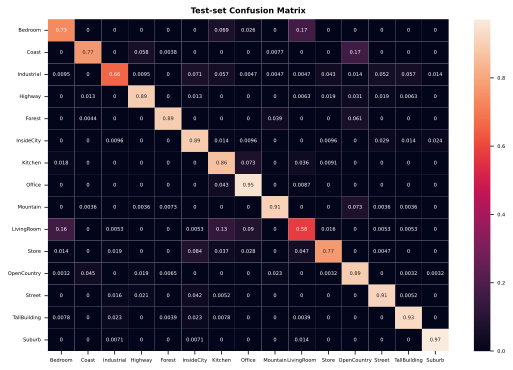

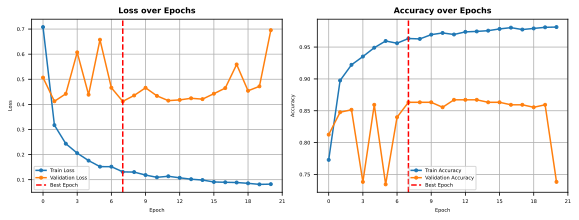



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 76.7 % | validation 84.4 %
       LOSS: train  0.708 | validation  0.443
Staring epoch   1 ...
   ACCURACY: train 89.8 % | validation 85.2 %
       LOSS: train  0.315 | validation  0.429
Staring epoch   2 ...
   ACCURACY: train 92.4 % | validation 72.3 %
       LOSS: train  0.243 | validation  0.781
Staring epoch   3 ...
   ACCURACY: train 93.8 % | validation 85.5 %
       LOSS: train  0.202 | validation  0.441
Staring epoch   4 ...
   ACCURACY: train 95.0 % | validation 73.4 %
       LOSS: train  0.178 | validation  0.694
Staring epoch   5 ...
   ACCURACY: train 95.7 % | validation 85.9 %
       LOSS: train  0.157 | validation  0.476
Staring epoch   6 ...
   ACCURACY: train 95.6 % | validation 73.8 %
       LOSS: train  0.150 | validation  0.730
Staring epoch   7 ...
   ACCURACY: train 96.8 % | validation 86.3 %
       LOSS: train  0.128 | validation  0.423
Staring epoch   8 ...
   ACCURACY: train 96.6 % | validation 87.5 %
       LOSS: train  

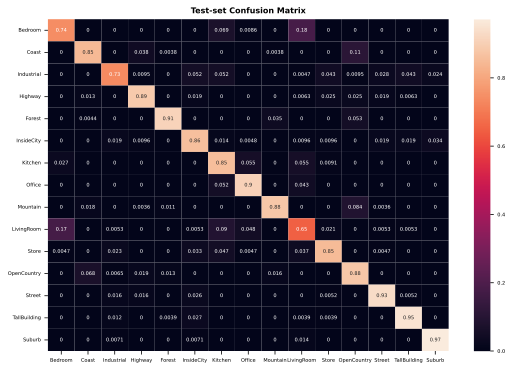

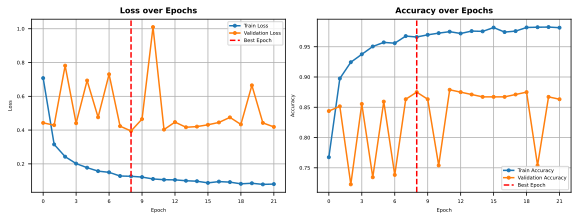



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




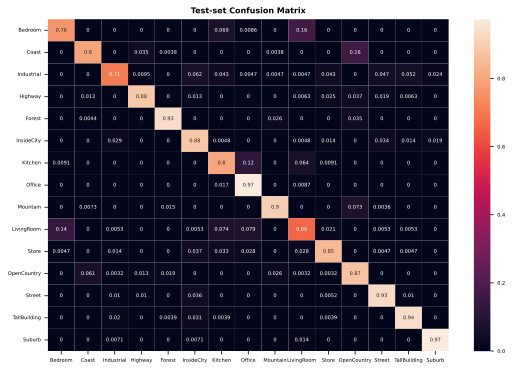

In [ ]:
# Test with SGD
n_realizations = 5
list_accs = []
list_best_epochs = []

results_df = pd.DataFrame()

for _ in range(n_realizations):
    # Load pre-trained AlexNet
    alexnet = models.alexnet(pretrained=True)

    # Freeze all network parameters
    for param in alexnet.parameters():
        param.requires_grad = False

    # Modify the last fully connected layer
    num_ftrs = alexnet.classifier[6].in_features # Compute the number of inputs featurs of the last layer
    alexnet.classifier[6] = nn.Linear(num_ftrs, 15) # Change the last layer, 15 is the number of classes of our problem
    # NB: Modifying tha last layer, automatically set "param.requires_grad = True" for this last layer
    _, test_accuracy, best_epoch = train_CNN(model = alexnet, MAX_epochs=60, MAX_patience= 12, learning_rate=0.001, momentum = 0.9, train_loader=train_set, validation_loader=val_set, test_loader=test_set, regularization_rate=0.008, optimizer_function= optim.SGD)
    list_accs.append(test_accuracy)
    list_best_epochs.append(best_epoch)

results_df["best_acc"] = list_accs
results_df["best_epoch"] = list_best_epochs
results_df.to_csv('exp_3_0001_09_augment_SGD.csv', index=False)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:13<00:00, 17.7MB/s]


Staring epoch   0 ...
   ACCURACY: train 82.7 % | validation 84.8 %
       LOSS: train  0.516 | validation  0.420
Staring epoch   1 ...
   ACCURACY: train 93.6 % | validation 85.9 %
       LOSS: train  0.199 | validation  0.427
Staring epoch   2 ...
   ACCURACY: train 96.0 % | validation 87.5 %
       LOSS: train  0.138 | validation  0.409
Staring epoch   3 ...
   ACCURACY: train 96.6 % | validation 85.2 %
       LOSS: train  0.116 | validation  0.410
Staring epoch   4 ...
   ACCURACY: train 97.1 % | validation 84.0 %
       LOSS: train  0.103 | validation  0.444
Staring epoch   5 ...
   ACCURACY: train 96.9 % | validation 87.1 %
       LOSS: train  0.099 | validation  0.427
Staring epoch   6 ...
   ACCURACY: train 97.7 % | validation 86.3 %
       LOSS: train  0.086 | validation  0.456
Staring epoch   7 ...
   ACCURACY: train 97.2 % | validation 84.4 %
       LOSS: train  0.092 | validation  0.540
Staring epoch   8 ...
   ACCURACY: train 97.2 % | validation 85.5 %
       LOSS: train  

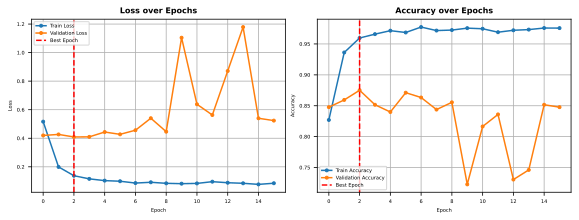



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 86 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 82.6 % | validation 85.5 %
       LOSS: train  0.523 | validation  0.425
Staring epoch   1 ...
   ACCURACY: train 94.0 % | validation 70.3 %
       LOSS: train  0.191 | validation  0.705
Staring epoch   2 ...
   ACCURACY: train 95.4 % | validation 87.1 %
       LOSS: train  0.150 | validation  0.441
Staring epoch   3 ...
   ACCURACY: train 96.6 % | validation 73.4 %
       LOSS: train  0.113 | validation  0.737
Staring epoch   4 ...
   ACCURACY: train 97.4 % | validation 85.9 %
       LOSS: train  0.098 | validation  0.451
Staring epoch   5 ...
   ACCURACY: train 97.1 % | validation 73.4 %
       LOSS: train  0.096 | validation  0.955
Staring epoch   6 ...
   ACCURACY: train 97.2 % | validation 82.4 %
       LOSS: train  0.095 | validation  0.519
Staring epoch   7 ...
   ACCURACY: train 97.3 % | validation 84.8 %
       LOSS: train  0.088 | validation  0.455
Staring epoch   8 ...
   ACCURACY: train 97.5 % | validation 70.7 %
       LOSS: train  

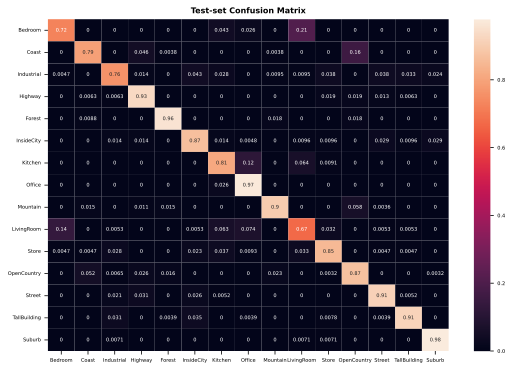

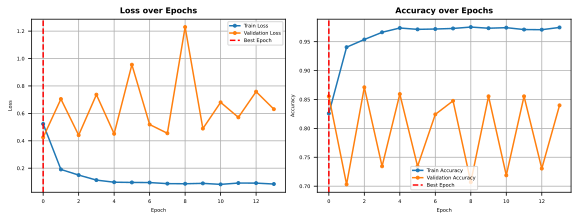



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 82.0 % | validation 86.3 %
       LOSS: train  0.528 | validation  0.444
Staring epoch   1 ...
   ACCURACY: train 93.6 % | validation 85.2 %
       LOSS: train  0.198 | validation  0.427
Staring epoch   2 ...
   ACCURACY: train 95.6 % | validation 85.2 %
       LOSS: train  0.145 | validation  0.439
Staring epoch   3 ...
   ACCURACY: train 96.4 % | validation 85.9 %
       LOSS: train  0.118 | validation  0.397
Staring epoch   4 ...
   ACCURACY: train 96.7 % | validation 84.4 %
       LOSS: train  0.110 | validation  0.420
Staring epoch   5 ...
   ACCURACY: train 97.1 % | validation 83.6 %
       LOSS: train  0.097 | validation  0.392
Staring epoch   6 ...
   ACCURACY: train 97.5 % | validation 85.5 %
       LOSS: train  0.094 | validation  0.483
Staring epoch   7 ...
   ACCURACY: train 97.7 % | validation 83.6 %
       LOSS: train  0.086 | validation  0.510
Staring epoch   8 ...
   ACCURACY: train 97.8 % | validation 85.2 %
       LOSS: train  

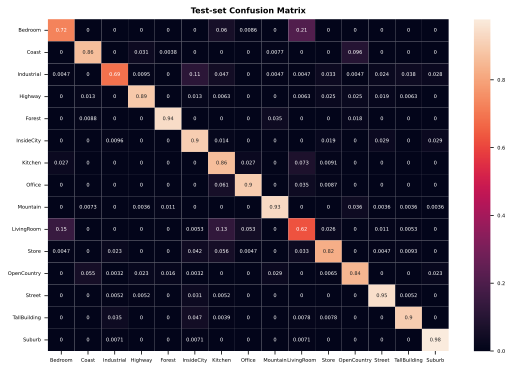

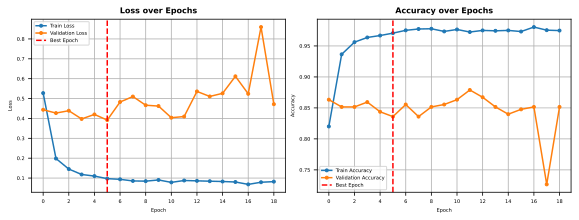



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 82.7 % | validation 70.7 %
       LOSS: train  0.515 | validation  1.101
Staring epoch   1 ...
   ACCURACY: train 93.7 % | validation 85.5 %
       LOSS: train  0.196 | validation  0.535
Staring epoch   2 ...
   ACCURACY: train 95.8 % | validation 86.7 %
       LOSS: train  0.140 | validation  0.409
Staring epoch   3 ...
   ACCURACY: train 96.7 % | validation 73.0 %
       LOSS: train  0.113 | validation  0.626
Staring epoch   4 ...
   ACCURACY: train 96.8 % | validation 87.1 %
       LOSS: train  0.107 | validation  0.398
Staring epoch   5 ...
   ACCURACY: train 96.3 % | validation 85.5 %
       LOSS: train  0.112 | validation  0.447
Staring epoch   6 ...
   ACCURACY: train 97.9 % | validation 85.5 %
       LOSS: train  0.081 | validation  0.454
Staring epoch   7 ...
   ACCURACY: train 97.4 % | validation 86.3 %
       LOSS: train  0.085 | validation  0.493
Staring epoch   8 ...
   ACCURACY: train 97.9 % | validation 86.7 %
       LOSS: train  

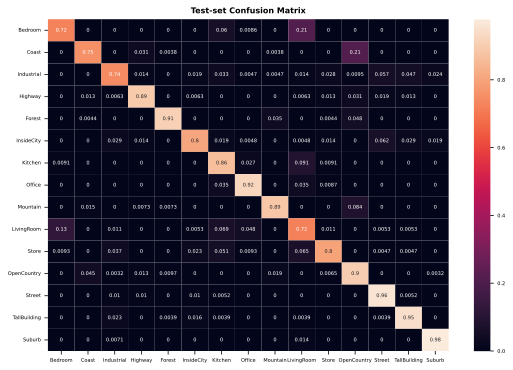

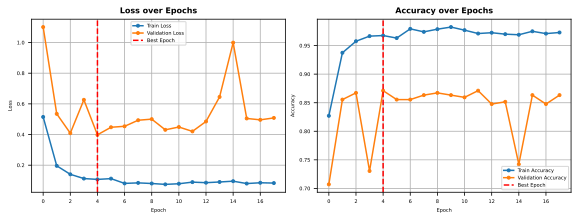



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 86 %




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Staring epoch   0 ...
   ACCURACY: train 83.4 % | validation 85.5 %
       LOSS: train  0.513 | validation  0.473
Staring epoch   1 ...
   ACCURACY: train 93.7 % | validation 74.6 %
       LOSS: train  0.198 | validation  0.829
Staring epoch   2 ...
   ACCURACY: train 95.9 % | validation 85.9 %
       LOSS: train  0.139 | validation  0.371
Staring epoch   3 ...
   ACCURACY: train 96.8 % | validation 85.5 %
       LOSS: train  0.115 | validation  0.457
Staring epoch   4 ...
   ACCURACY: train 97.1 % | validation 85.9 %
       LOSS: train  0.100 | validation  0.528
Staring epoch   5 ...
   ACCURACY: train 97.1 % | validation 85.2 %
       LOSS: train  0.101 | validation  0.469
Staring epoch   6 ...
   ACCURACY: train 97.3 % | validation 86.3 %
       LOSS: train  0.091 | validation  0.466
Staring epoch   7 ...
   ACCURACY: train 96.9 % | validation 73.0 %
       LOSS: train  0.097 | validation  0.678
Staring epoch   8 ...
   ACCURACY: train 97.7 % | validation 85.2 %
       LOSS: train  

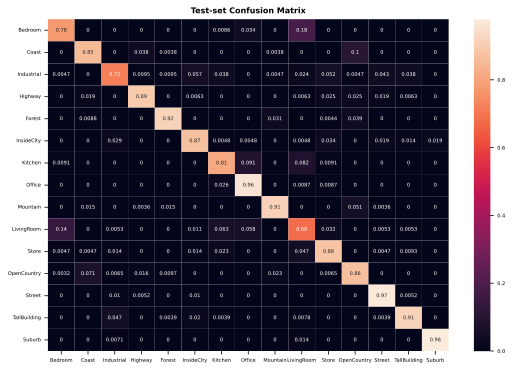

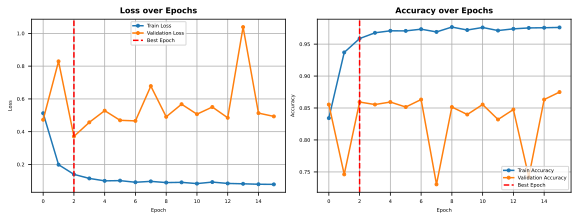



____________________________________________________________________________________________________________
TEST-SET STATISTICS:
Accuracy of the network on the test set: 85 %




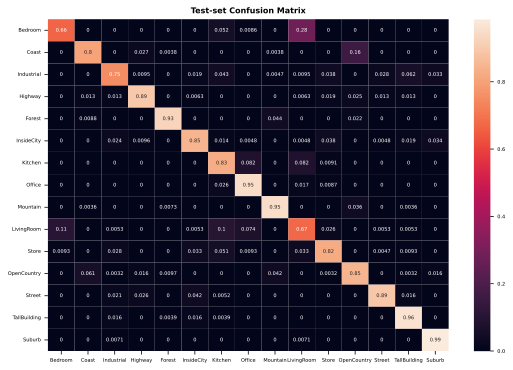

In [ ]:
# Test with Adam
n_realizations = 5
list_accs = []
list_best_epochs = []

results_df = pd.DataFrame()

for _ in range(n_realizations):
    # Load pre-trained AlexNet
    alexnet = models.alexnet(pretrained=True)

    # Freeze all network parameters
    for param in alexnet.parameters():
        param.requires_grad = False

    # Modify the last fully connected layer
    num_ftrs = alexnet.classifier[6].in_features # Compute the number of inputs featurs of the last layer
    alexnet.classifier[6] = nn.Linear(num_ftrs, 15) # Change the last layer, 15 is the number of classes of our problem
    # NB: Modifying tha last layer, automatically set "param.requires_grad = True" for this last layer
    _, test_accuracy, best_epoch = train_CNN(model = alexnet, MAX_epochs=60, MAX_patience= 12, learning_rate=0.001, train_loader=train_set, validation_loader=val_set, test_loader=test_set, regularization_rate=0.008, optimizer_function= optim.Adam)
    list_accs.append(test_accuracy)
    list_best_epochs.append(best_epoch)

results_df["best_acc"] = list_accs
results_df["best_epoch"] = list_best_epochs
results_df.to_csv('exp_3_0001_augment_Adam.csv', index=False)

### Results analysis

In [ ]:
df_1 = pd.read_csv('exp_3_0001_09_augment_SGD.csv')
df_2 = pd.read_csv('exp_3_0001_09_nonAugment_SGD.csv')
df_3 = pd.read_csv('exp_3_0001_augment_Adam.csv')
df_4 = pd.read_csv('exp_3_0001_nonAugment_Adam.csv')

In [ ]:
df_1

,best_acc,best_epoch
0,0.855386,1
1,0.857861,2
2,0.840573,2
3,0.859707,7
4,0.857011,8


In [ ]:
# Load experiments results
df_accuracy = pd.DataFrame()

df_accuracy['augment_SGD'] = df_1['best_acc']
df_accuracy['nonAugmented_SGD'] = df_2['best_acc']
df_accuracy['aumented_Adam'] = df_3['best_acc']
df_accuracy['nonAugmented_Adam'] = df_4['best_acc']

df_accuracy

,augment_SGD,nonAugmented_SGD,aumented_Adam,nonAugmented_Adam
0,0.855386,0.861517,0.862035,0.860335
1,0.857861,0.861517,0.856198,0.856198
2,0.840573,0.858008,0.854721,0.865987
3,0.859707,0.864694,0.865470,0.860372
4,0.857011,0.864029,0.854314,0.855533


In [ ]:
# Compute sample average accuracy for each experiment
df_average_accuracy = df_accuracy.mean()

# Descending order
df_average_accuracy = df_average_accuracy.sort_values(ascending=False)

df_average_accuracy

nonAugmented_SGD     0.861953
nonAugmented_Adam    0.859685
aumented_Adam        0.858548
augment_SGD          0.854108
dtype: float64

In [ ]:
# Compute sample variance of accuracy for each experiment
df_accuracy_variance = df_accuracy.var()

df_accuracy_variance

augment_SGD          0.000060
nonAugmented_SGD     0.000007
aumented_Adam        0.000025
nonAugmented_Adam    0.000018
dtype: float64

In [ ]:
print(f"                        ACCURACY                        ")
print(f"________________________________________________________")
print(f"      Experiment         |     Mean     |   Variance   |")
print(f"_________________________|______________|______________|")
for column in df_average_accuracy.index:
    print(f"{column:<25}|   {df_average_accuracy[column]:.6f}   |   {df_accuracy_variance[column]:.6f}   |")

                        ACCURACY                        
________________________________________________________
      Experiment         |     Mean     |   Variance   |
_________________________|______________|______________|
nonAugmented_SGD         |   0.861953   |   0.000007   |
nonAugmented_Adam        |   0.859685   |   0.000018   |
aumented_Adam            |   0.858548   |   0.000025   |
augment_SGD              |   0.854108   |   0.000060   |


In [ ]:
from scipy.stats import ttest_ind

# Compute sample average accuracy for each experiment
means = df_accuracy.mean()

# Find the experiment with highest average
max_mean_column = means.idxmax()

results = []

# Computing for each experiment (except max_average) the Welch's t-test for the null hypotesis: "max_average = other_average"
for column in df_accuracy.columns:
    if column != max_mean_column:
        _, p_value = ttest_ind(df_accuracy[max_mean_column], df_accuracy[column], equal_var=False)

        results.append((column, p_value))

# Display resulst in descending order of p-value
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print(f"Highest average accuracy: {df_accuracy[max_mean_column].mean()}")
print(f"Best-experiment: {max_mean_column}\n\n")

print(f"Computing for each other experiment, except {max_mean_column}, the Welch's t-test for the null hypotesis: best_average == other_average")
print(f"Results are printed with p-value in descending order\n")

for result in results_sorted:
    print(f"{result[0]:<18} vs  Best-experiment:    p-value = {result[1]:.6f}")

# If p-value is smaller than the treshold, the null hypotesis is rejected

Highest average accuracy: 0.8619533096926715
Best-experiment: nonAugmented_SGD


Computing for each other experiment, except nonAugmented_SGD, the Welch's t-test for the null hypotesis: best_average == other_average
Results are printed with p-value in descending order

nonAugmented_Adam  vs  Best-experiment:    p-value = 0.340376
aumented_Adam      vs  Best-experiment:    p-value = 0.222797
augment_SGD        vs  Best-experiment:    p-value = 0.085209


### Testing the best model

In [ ]:
# Load pre-trained AlexNet
alexnet = models.alexnet(pretrained=True)

# Freeze all network parameters
for param in alexnet.parameters():
    param.requires_grad = False

# Modify the last fully connected layer
num_ftrs = alexnet.classifier[6].in_features # Compute the number of inputs featurs of the last layer
alexnet.classifier[6] = nn.Linear(num_ftrs, 15) # Change the last layer, 15 is the number of classes of our problem
# NB: Modifying tha last layer, automatically set "param.requires_grad = True" for this last layer

_, __, ___ = train_CNN(model = alexnet, MAX_epochs=60, MAX_patience= 12, learning_rate=0.001, train_loader=train_set, validation_loader=val_set, test_loader=test_set, regularization_rate=0.008, optimizer_function= optim.Adam)